In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

#### Load the datasets

In [2]:
linear_function_dataset = np.genfromtxt("data/linear_function_data.txt", dtype='double')
nonlinear_function_dataset = np.genfromtxt("data/nonlinear_function_data.txt", dtype='double')

#### Plot the datasets

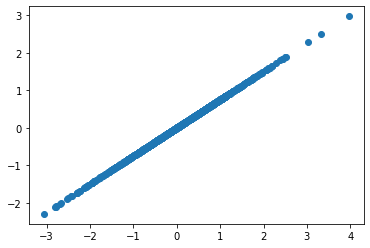

In [3]:
lf_x, lf_y = linear_function_dataset.T

plt.scatter(lf_x, lf_y)

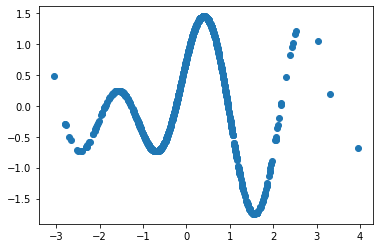

In [4]:
nlf_x, nlf_y = nonlinear_function_dataset.T
plt.scatter(nlf_x, nlf_y)

In [5]:
def least_square(a,b):
    x = np.vstack([a, np.zeros(len(b))]).T
    return LA.lstsq(x, b, rcond=None)[0]

In [6]:
lf_m, lf_c = least_square(lf_x, lf_y)
nlf_m, nlf_c = least_square(nlf_x, nlf_y)

In [7]:
function_line_l = np.polyval([lf_m, lf_c], lf_x)
function_line_n = np.polyval([nlf_m, nlf_c], nlf_x)

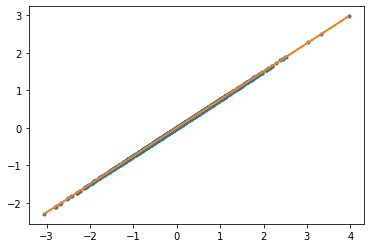

In [8]:
plt.plot(lf_x, lf_y, '.')
plt.plot(lf_x, function_line_l)

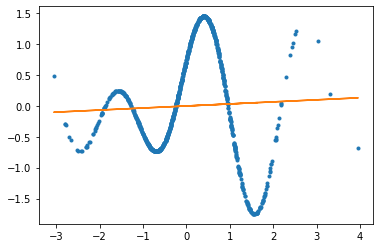

In [9]:
plt.plot(nlf_x, nlf_y, '.')
plt.plot(nlf_x, function_line_n)

In [10]:
def rbf(x, x_l, ep, plot):
    rbf_val = np.exp(-(x-x_l)**2 / (ep**2))
    if plot:
        plt.plot(x, rbf_val, '.')
    return rbf_val

In [11]:
def approximation_function(x, y, l, plot, ep=1):

    if plot:
        fig = plt.figure(figsize=(10,6))
    
    center_bf = []
    diff = np.max(x)-np.min(x)
    for i in range(l):
        center_bf.append(np.min(x) + (i*(diff)/l))

    func_val = []
    
    for i in range(l):
        x_l = np.ones(len(x))*center_bf[i]
        phi.append(rbf(x, x_l, ep, plot))
        
    phi = np.array(func_val)
     
    if plot:
        plt.show()
        
    c = np.vstack([phi, np.zeros(func_val.shape)]).T
    
    return LA.lstsq(c, y, rcond=None)[0], phi

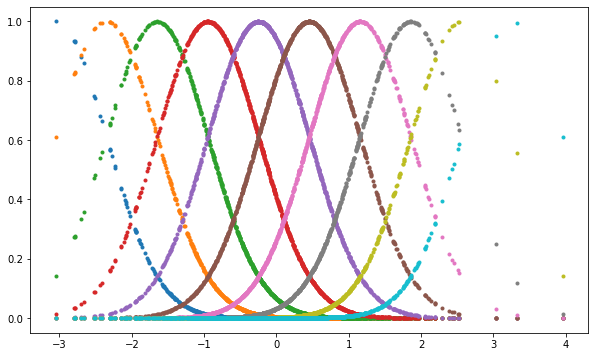

(10, 1000)


In [12]:
coef, phi = approximation_function(nlf_x, nlf_y, 10, True)
coef = coef[:10]

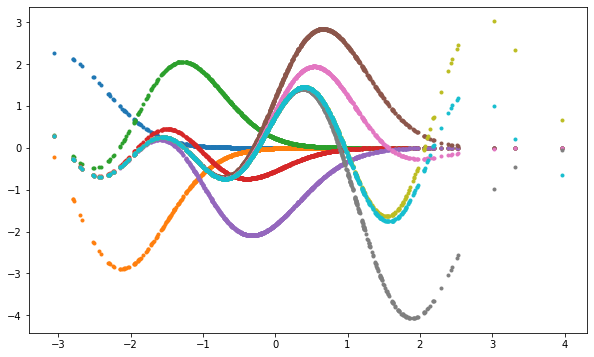

In [19]:
fig = plt.figure(figsize=(10,6))

func_val = np.zeros(nlf_x.shape)
l=10
ep=1
for i in range(l):
    func_val = func_val + phi[i] * coef[i]
    plt.plot(nlf_x, func_val, '.')

plt.show()

(1000,)


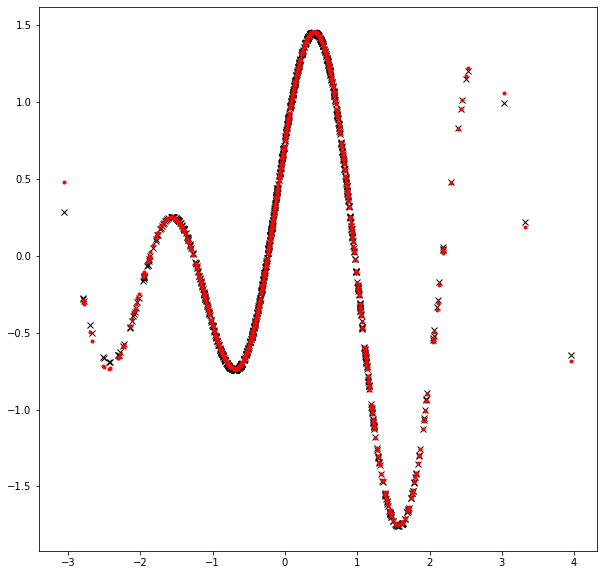

In [16]:
fig = plt.figure(figsize=(10,10))
print(func_val.shape)
plt.plot(nlf_x, func_val, 'xk')
plt.plot(nlf_x, nlf_y, '.r')